TF-IDF stands for Term Frequency–Inverse Document Frequency. It is a widely used statistical measure in Natural Language Processing (NLP) and Information Retrieval to evaluate how important a word is to a document in a collection or corpus.

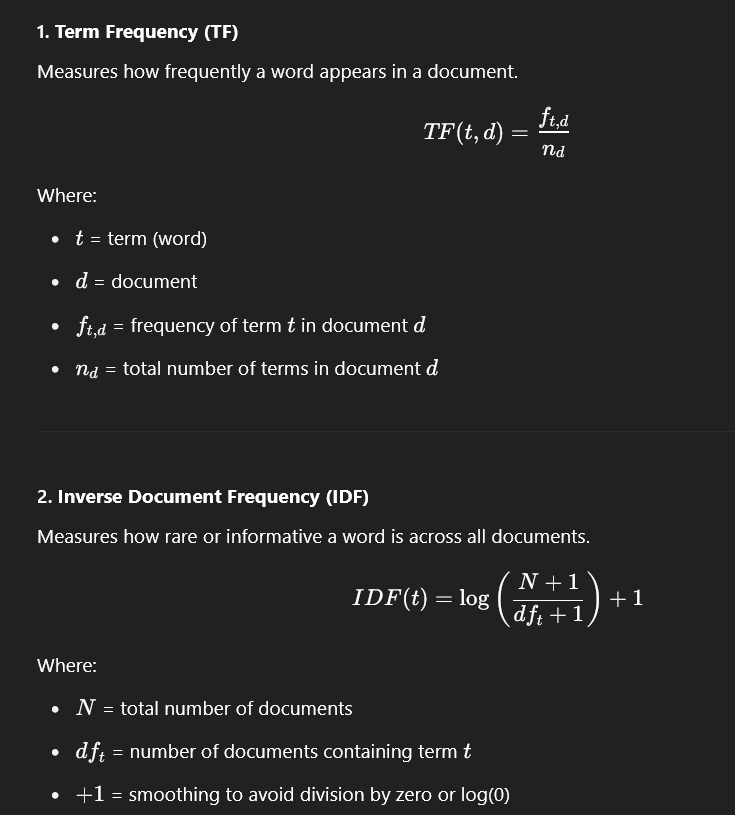
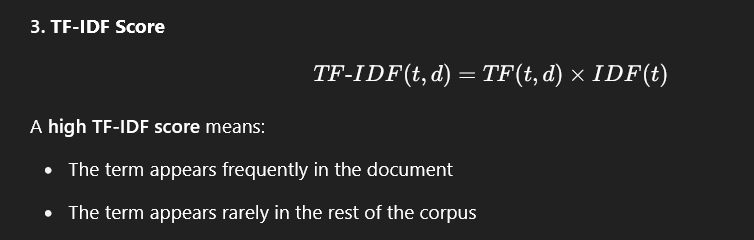

In [56]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [57]:
text = """Artificial Intelligence is transforming the world rapidly.
Many industries like healthcare, finance, and transportation are leveraging artificial intelligence to improve efficiency.
However, ethical considerations and data privacy remain significant challenges to address."""


In [58]:
stop_words = set(stopwords.words('english'))

In [59]:
sentences = [s.strip() for s in text.split('.') if s.strip()]

In [60]:
sentences

['Artificial Intelligence is transforming the world rapidly',
 'Many industries like healthcare, finance, and transportation are leveraging artificial intelligence to improve efficiency',
 'However, ethical considerations and data privacy remain significant challenges to address']

In [61]:
# Preprocessing each sentence: tokenize, lowercase, remove stopwords and punctuation
def preprocess(sentence):
    return [w for w in word_tokenize(sentence.lower()) if w.isalpha() and w not in stop_words]

In [62]:
documents = [preprocess(sent) for sent in sentences]

In [63]:
documents

[['artificial', 'intelligence', 'transforming', 'world', 'rapidly'],
 ['many',
  'industries',
  'like',
  'healthcare',
  'finance',
  'transportation',
  'leveraging',
  'artificial',
  'intelligence',
  'improve',
  'efficiency'],
 ['however',
  'ethical',
  'considerations',
  'data',
  'privacy',
  'remain',
  'significant',
  'challenges',
  'address']]

In [72]:
# 3. Build vocabulary (unique sorted words from all documents)
all_words = []
for doc in documents:
    all_words.extend(doc)

vocab = sorted(set(all_words))  # unique sorted vocabulary

In [65]:
vocab

['address',
 'artificial',
 'challenges',
 'considerations',
 'data',
 'efficiency',
 'ethical',
 'finance',
 'healthcare',
 'however',
 'improve',
 'industries',
 'intelligence',
 'leveraging',
 'like',
 'many',
 'privacy',
 'rapidly',
 'remain',
 'significant',
 'transforming',
 'transportation',
 'world']

In [75]:
# 4. Compute Term Frequency (TF) for each document
def compute_tf(doc):
    total_terms = len(doc)
    return {word: doc.count(word) / total_terms if total_terms > 0 else 0 for word in vocab}

tf_docs = [compute_tf(doc) for doc in documents]

In [76]:
tf_docs

[{'address': 0.0,
  'artificial': 0.2,
  'challenges': 0.0,
  'considerations': 0.0,
  'data': 0.0,
  'efficiency': 0.0,
  'ethical': 0.0,
  'finance': 0.0,
  'healthcare': 0.0,
  'however': 0.0,
  'improve': 0.0,
  'industries': 0.0,
  'intelligence': 0.2,
  'leveraging': 0.0,
  'like': 0.0,
  'many': 0.0,
  'privacy': 0.0,
  'rapidly': 0.2,
  'remain': 0.0,
  'significant': 0.0,
  'transforming': 0.2,
  'transportation': 0.0,
  'world': 0.2},
 {'address': 0.0,
  'artificial': 0.09090909090909091,
  'challenges': 0.0,
  'considerations': 0.0,
  'data': 0.0,
  'efficiency': 0.09090909090909091,
  'ethical': 0.0,
  'finance': 0.09090909090909091,
  'healthcare': 0.09090909090909091,
  'however': 0.0,
  'improve': 0.09090909090909091,
  'industries': 0.09090909090909091,
  'intelligence': 0.09090909090909091,
  'leveraging': 0.09090909090909091,
  'like': 0.09090909090909091,
  'many': 0.09090909090909091,
  'privacy': 0.0,
  'rapidly': 0.0,
  'remain': 0.0,
  'significant': 0.0,
  'tran

In [77]:
# Computing Inverse Document Frequency (IDF) for the corpus
def compute_idf(docs):
    N = len(docs)
    idf_values = {}
    for word in vocab:
        containing_docs = sum(1 for doc in docs if word in doc)
        idf_values[word] = math.log((N + 1) / (1 + containing_docs)) + 1
    return idf_values

In [79]:
idf = compute_idf(documents)

In [80]:
idf

{'address': 1.6931471805599454,
 'artificial': 1.2876820724517808,
 'challenges': 1.6931471805599454,
 'considerations': 1.6931471805599454,
 'data': 1.6931471805599454,
 'efficiency': 1.6931471805599454,
 'ethical': 1.6931471805599454,
 'finance': 1.6931471805599454,
 'healthcare': 1.6931471805599454,
 'however': 1.6931471805599454,
 'improve': 1.6931471805599454,
 'industries': 1.6931471805599454,
 'intelligence': 1.2876820724517808,
 'leveraging': 1.6931471805599454,
 'like': 1.6931471805599454,
 'many': 1.6931471805599454,
 'privacy': 1.6931471805599454,
 'rapidly': 1.6931471805599454,
 'remain': 1.6931471805599454,
 'significant': 1.6931471805599454,
 'transforming': 1.6931471805599454,
 'transportation': 1.6931471805599454,
 'world': 1.6931471805599454}

In [81]:
# Computing TF-IDF for each document
def compute_tfidf(tf, idf):
    return {word: tf[word] * idf[word] for word in vocab}

tfidf_docs = [compute_tfidf(tf_doc, idf) for tf_doc in tf_docs]

In [82]:
tfidf_docs

[{'address': 0.0,
  'artificial': 0.2575364144903562,
  'challenges': 0.0,
  'considerations': 0.0,
  'data': 0.0,
  'efficiency': 0.0,
  'ethical': 0.0,
  'finance': 0.0,
  'healthcare': 0.0,
  'however': 0.0,
  'improve': 0.0,
  'industries': 0.0,
  'intelligence': 0.2575364144903562,
  'leveraging': 0.0,
  'like': 0.0,
  'many': 0.0,
  'privacy': 0.0,
  'rapidly': 0.3386294361119891,
  'remain': 0.0,
  'significant': 0.0,
  'transforming': 0.3386294361119891,
  'transportation': 0.0,
  'world': 0.3386294361119891},
 {'address': 0.0,
  'artificial': 0.11706200658652553,
  'challenges': 0.0,
  'considerations': 0.0,
  'data': 0.0,
  'efficiency': 0.15392247095999503,
  'ethical': 0.0,
  'finance': 0.15392247095999503,
  'healthcare': 0.15392247095999503,
  'however': 0.0,
  'improve': 0.15392247095999503,
  'industries': 0.15392247095999503,
  'intelligence': 0.11706200658652553,
  'leveraging': 0.15392247095999503,
  'like': 0.15392247095999503,
  'many': 0.15392247095999503,
  'priv

In [84]:
# Converting TF-IDF dicts to vectors (numpy arrays) aligned with vocab order
tfidf_matrix = np.array([[doc[word] for word in vocab] for doc in tfidf_docs])

In [86]:
tfidf_matrix

array([[0.        , 0.25753641, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.25753641, 0.        , 0.        ,
        0.        , 0.        , 0.33862944, 0.        , 0.        ,
        0.33862944, 0.        , 0.33862944],
       [0.        , 0.11706201, 0.        , 0.        , 0.        ,
        0.15392247, 0.        , 0.15392247, 0.15392247, 0.        ,
        0.15392247, 0.15392247, 0.11706201, 0.15392247, 0.15392247,
        0.15392247, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.15392247, 0.        ],
       [0.18812746, 0.        , 0.18812746, 0.18812746, 0.18812746,
        0.        , 0.18812746, 0.        , 0.        , 0.18812746,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.18812746, 0.        , 0.18812746, 0.18812746,
        0.        , 0.        , 0.        ]])

### Cosine Similarity

In [89]:
# Cosine similarity function
def cosine_similarity(vec1, vec2):
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0
    return np.dot(vec1, vec2) / (norm1 * norm2)

In [91]:
# Computing similarity matrix between documents
similarity_matrix = np.array([[cosine_similarity(vec1, vec2) for vec2 in tfidf_matrix] for vec1 in tfidf_matrix])

In [92]:
sim_df = pd.DataFrame(np.round(similarity_matrix, 2),
                      columns=[f'Doc{i+1}' for i in range(len(documents))],
                      index=[f'Doc{i+1}' for i in range(len(documents))])

In [94]:
sim_df

,Doc1,Doc2,Doc3
Doc1,1.00,0.18,0.0
Doc2,0.18,1.00,0.0
Doc3,0.00,0.00,1.0


### Boolean Search

In [103]:
def boolean_search(query):
    tokens = query.lower().split()
    result = set()
    i = 0
    while i < len(tokens):
        word = tokens[i]
        if word == 'and':
            i += 1
            result &= {idx for idx, doc in enumerate(documents) if tokens[i] in doc}
        elif word == 'or':
            i += 1
            result |= {idx for idx, doc in enumerate(documents) if tokens[i] in doc}
        elif word == 'not':
            i += 1
            result -= {idx for idx, doc in enumerate(documents) if tokens[i] in doc}
        else:
            if not result:
                result = {idx for idx, doc in enumerate(documents) if word in doc}
        i += 1
    return result

In [108]:
# Test queries
queries = [
    "artificial AND intelligence",
    "healthcare OR finance",
    "data AND privacy",
    "transportation NOT efficiency"
]

In [109]:
for q in queries:
    print(f"\nQuery: '{q}'")
    matches = boolean_search(q)
    if matches:
        for idx in matches:
            print(f"Doc {idx+1}: {documents[idx]}")
    else:
        print("No matches found.")


Query: 'artificial AND intelligence'
Doc 1: ['artificial', 'intelligence', 'transforming', 'world', 'rapidly']
Doc 2: ['many', 'industries', 'like', 'healthcare', 'finance', 'transportation', 'leveraging', 'artificial', 'intelligence', 'improve', 'efficiency']

Query: 'healthcare OR finance'
Doc 2: ['many', 'industries', 'like', 'healthcare', 'finance', 'transportation', 'leveraging', 'artificial', 'intelligence', 'improve', 'efficiency']

Query: 'data AND privacy'
Doc 3: ['however', 'ethical', 'considerations', 'data', 'privacy', 'remain', 'significant', 'challenges', 'address']

Query: 'transportation NOT efficiency'
No matches found.
